In [1]:
import numpy as np
import matplotlib.pyplot as plt

ph = np.load('Photon.npy')
ele = np.load('Electron.npy')
pi0 = np.load('Pizero.npy')
pipm = np.load('Piplusminus.npy')

In [2]:
data = np.vstack((ph[:100000,:],ele[:100000,:],pi0[:100000,:],pipm[:100000,:]))
np.random.shuffle(data)
data.shape

(400000, 323)

In [3]:
truez = data[:,2]
psb = data[:,20:83]
emb1 = data[:,83:134]
emb2 = data[:,134:197]
emb3 = data[:,197:260]                   
hab1 = data[:,260:]

# sum of all cells
cells_sum = np.sum(data[:,20:],axis=1).reshape(-1,1)

# sum of layers in phi
psb_sum = np.sum(psb.reshape(-1,7,9),axis=1)
emb1_sum = np.sum(emb1.reshape(-1,3,17),axis=1)
emb2_sum = np.sum(emb2.reshape(-1,7,9),axis=1)
emb3_sum = np.sum(emb3.reshape(-1,7,9),axis=1)
hab1_sum = np.sum(hab1.reshape(-1,7,9),axis=1)

# normalised sums
psb_nsum = psb_sum / cells_sum
emb1_nsum = emb1_sum / cells_sum
emb2_nsum = emb2_sum / cells_sum
emb3_nsum = emb3_sum / cells_sum
hab1_nsum = hab1_sum / cells_sum

# center eta of layers
psb_eta = data[:,6]
emb1_eta = data[:,8]
emb2_eta = data[:,10]
emb3_eta = data[:,12]
hab1_eta = data[:,14]
differ1 = psb_eta - emb1_eta
differ2 = emb1_eta - emb2_eta
differ3 = emb2_eta - emb3_eta
differ4 = emb3_eta - hab1_eta

In [4]:
train1 = np.column_stack((psb_nsum,emb1_nsum,emb2_nsum,
                              psb_eta.reshape(-1,1),emb1_eta.reshape(-1,1),emb2_eta.reshape(-1,1),
                              differ1.reshape(-1,1),differ2.reshape(-1,1)))

train2 = np.column_stack((psb_nsum,emb1_nsum,emb2_nsum,emb3_nsum,hab1_nsum,
                              psb_eta.reshape(-1,1),emb1_eta.reshape(-1,1),
                          emb2_eta.reshape(-1,1),emb3_eta.reshape(-1,1),hab1_eta.reshape(-1,1),
                              differ1.reshape(-1,1),differ2.reshape(-1,1),differ3.reshape(-1,1),differ4.reshape(-1,1)))

train_target = truez

In [5]:
import xgboost as xgb

# create the xgboost model
model = xgb.XGBRegressor(
    learning_rate=0.2,    # Controls the step size shrinkage
    n_estimators=600,      # Number of boosting rounds or trees
    max_depth=6,     # Maximum depth of a tree
    objective='reg:squarederror')

model.fit(train2, train_target)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=6, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=600, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [6]:
def Meansum(array):
    
    cellsum = np.sum(array[:,20:],axis=1)
    sortsum = np.sort(cellsum)
    sortsum = sortsum.reshape(50,2000)
    meansum = np.mean(sortsum,axis=1)
    SEM = np.std(sortsum, ddof=1,axis=1)/np.sqrt(50)
    
    
    return meansum, SEM
    

In [7]:
ph_test = ph[200000:300000,:]
ele_test = ele[200000:300000,:]
pi0_test = pi0[200000:300000,:]
pipm_test = pipm[200000:300000,:]

cellsum_ph = Meansum(ph_test)[0]
cellsum_ele = Meansum(ele_test)[0]
cellsum_pi0 = Meansum(pi0_test)[0]
cellsum_pipm = Meansum(pipm_test)[0]
err_ph = Meansum(ph_test)[1]
err_ele = Meansum(ele_test)[1]
err_pi0 = Meansum(pi0_test)[1]
err_pipm = Meansum(pipm_test)[1]

In [8]:
def RMS(array,A,B):
    
    sorted_array = array[np.argsort(np.sum(array[:, 20:], axis=1))]
    truez = sorted_array[:,2]
    psb = sorted_array[:,20:83]
    emb1 = sorted_array[:,83:134]
    emb2 = sorted_array[:,134:197]
    emb3 = sorted_array[:,197:260]                   
    hab1 = sorted_array[:,260:]
    # sum of all cells
    cells_sum = np.sum(sorted_array[:,20:],axis=1).reshape(-1,1)
    # sum of layers in phi
    psb_sum = np.sum(psb.reshape(-1,7,9),axis=1)
    emb1_sum = np.sum(emb1.reshape(-1,3,17),axis=1)
    emb2_sum = np.sum(emb2.reshape(-1,7,9),axis=1)
    emb3_sum = np.sum(emb3.reshape(-1,7,9),axis=1)
    hab1_sum = np.sum(hab1.reshape(-1,7,9),axis=1)
    # normalised sums
    psb_nsum = psb_sum / cells_sum
    emb1_nsum = emb1_sum / cells_sum
    emb2_nsum = emb2_sum / cells_sum
    emb3_nsum = emb3_sum / cells_sum
    hab1_nsum = hab1_sum / cells_sum
    # center eta of layers
    psb_eta = sorted_array[:,6]
    emb1_eta = sorted_array[:,8]
    emb2_eta = sorted_array[:,10]
    emb3_eta = sorted_array[:,12]
    hab1_eta = sorted_array[:,14]
    differ1 = psb_eta - emb1_eta
    differ2 = emb1_eta - emb2_eta
    differ3 = emb2_eta - emb3_eta
    differ4 = emb3_eta - hab1_eta
    
    test = np.column_stack((psb_nsum,emb1_nsum,emb2_nsum,emb3_nsum,hab1_nsum,psb_eta.reshape(-1,1),emb1_eta.reshape(-1,1),
                          emb2_eta.reshape(-1,1),emb3_eta.reshape(-1,1),hab1_eta.reshape(-1,1),
                              differ1.reshape(-1,1),differ2.reshape(-1,1),differ3.reshape(-1,1),differ4.reshape(-1,1)))
    
    T = test[A:B,:]
    pred = model.predict(T)
    
    x = (truez[A:B]-pred)**2
    dx = np.std(x,ddof=1) / np.sqrt(2000)
    RMS = np.sqrt(np.mean(x))
    uc = (1/2)* (dx/np.mean(x)) * RMS
 
    return RMS,uc

In [9]:
A = np.arange(0,100000,2000)
B = np.arange(2000,102000,2000)

RMS_ph = np.zeros(50)
RMS_ele = np.zeros(50)
RMS_pi0 = np.zeros(50)
RMS_pipm = np.zeros(50)
uc_ph = np.zeros(50)
uc_ele = np.zeros(50)
uc_pi0 = np.zeros(50)
uc_pipm = np.zeros(50)

for i in range(50):
    RMS_ph[i] = RMS(ph_test,A[i],B[i])[0]
    RMS_ele[i] = RMS(ele_test,A[i],B[i])[0]
    RMS_pi0[i] = RMS(pi0_test,A[i],B[i])[0]
    RMS_pipm[i] = RMS(pipm_test,A[i],B[i])[0]
    uc_ph[i] = RMS(ph_test,A[i],B[i])[1]
    uc_ele[i] = RMS(ele_test,A[i],B[i])[1]
    uc_pi0[i] = RMS(pi0_test,A[i],B[i])[1]
    uc_pipm[i] = RMS(pipm_test,A[i],B[i])[1]

Text(0.5, 1.0, 'Correlation of RMS to Deposit Energy in cells')

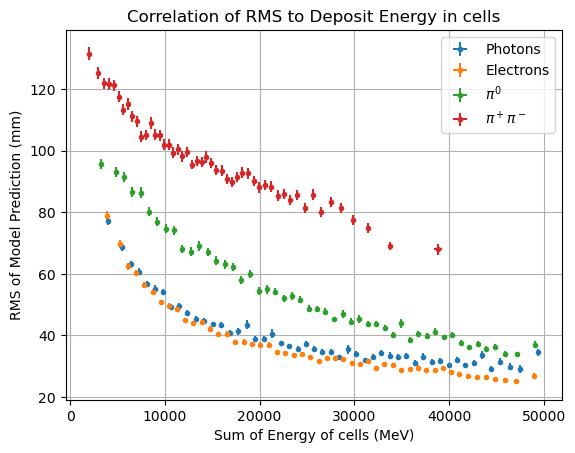

In [10]:
plt.figure()
plt.errorbar(cellsum_ph, RMS_ph, xerr=err_ph, yerr=uc_ph, fmt='.',label='Photons')
plt.errorbar(cellsum_ele,RMS_ele, xerr=err_ele, yerr=uc_ele,fmt='.',label='Electrons')
plt.errorbar(cellsum_pi0,RMS_pi0, xerr=err_pi0, yerr=uc_pi0,fmt='.',label='$\pi^0$')
plt.errorbar(cellsum_pipm,RMS_pipm, xerr=err_pipm, yerr=uc_pipm,fmt='.',label='$\pi^+\pi^-$')
plt.legend()
plt.grid(True)
plt.xlabel("Sum of Energy of cells (MeV)")
plt.ylabel("RMS of Model Prediction (mm)")
plt.title("Correlation of RMS to Deposit Energy in cells")

In [11]:
def Meantrue(array):
    
    truept = array[:,3]
    sortpt = np.sort(truept)
    sortpt = sortpt.reshape(50,2000)
    meanpt = np.mean(sortpt,axis=1)
    SEM = np.std(sortpt, ddof=1,axis=1)/np.sqrt(50)
    
    return meanpt, SEM

In [12]:
Pt_ph = Meantrue(ph_test)[0]
Pt_ele = Meantrue(ele_test)[0]
Pt_pi0 = Meantrue(pi0_test)[0]
Pt_pipm = Meantrue(pipm_test)[0]
err_ph1 = Meantrue(ph_test)[1]
err_ele1 = Meantrue(ele_test)[1]
err_pi01 = Meantrue(pi0_test)[1]
err_pipm1 = Meantrue(pipm_test)[1]

In [13]:
def RMS_true(array,A,B):
    
    sorted_array = array[np.argsort(array[:,3])]
    truez = sorted_array[:,2]
    psb = sorted_array[:,20:83]
    emb1 = sorted_array[:,83:134]
    emb2 = sorted_array[:,134:197]
    emb3 = sorted_array[:,197:260]                   
    hab1 = sorted_array[:,260:]
    # sum of all cells
    cells_sum = np.sum(sorted_array[:,20:],axis=1).reshape(-1,1)
    # sum of layers in phi
    psb_sum = np.sum(psb.reshape(-1,7,9),axis=1)
    emb1_sum = np.sum(emb1.reshape(-1,3,17),axis=1)
    emb2_sum = np.sum(emb2.reshape(-1,7,9),axis=1)
    emb3_sum = np.sum(emb3.reshape(-1,7,9),axis=1)
    hab1_sum = np.sum(hab1.reshape(-1,7,9),axis=1)
    # normalised sums
    psb_nsum = psb_sum / cells_sum
    emb1_nsum = emb1_sum / cells_sum
    emb2_nsum = emb2_sum / cells_sum
    emb3_nsum = emb3_sum / cells_sum
    hab1_nsum = hab1_sum / cells_sum
    # center eta of layers
    psb_eta = sorted_array[:,6]
    emb1_eta = sorted_array[:,8]
    emb2_eta = sorted_array[:,10]
    emb3_eta = sorted_array[:,12]
    hab1_eta = sorted_array[:,14]
    differ1 = psb_eta - emb1_eta
    differ2 = emb1_eta - emb2_eta
    differ3 = emb2_eta - emb3_eta
    differ4 = emb3_eta - hab1_eta
    
    test = np.column_stack((psb_nsum,emb1_nsum,emb2_nsum,emb3_nsum,hab1_nsum,psb_eta.reshape(-1,1),emb1_eta.reshape(-1,1),
                          emb2_eta.reshape(-1,1),emb3_eta.reshape(-1,1),hab1_eta.reshape(-1,1),
                              differ1.reshape(-1,1),differ2.reshape(-1,1),differ3.reshape(-1,1),differ4.reshape(-1,1)))
    
    T = test[A:B,:]
    pred = model.predict(T)
    
    x = (truez[A:B]-pred)**2
    dx = np.std(x,ddof=1) / np.sqrt(2000)
    RMS = np.sqrt(np.mean(x))
    uc = (1/2)* (dx/np.mean(x)) * RMS
 
    return RMS,uc

In [15]:
RMS_ph1 = np.zeros(50)
RMS_ele1 = np.zeros(50)
RMS_pi01 = np.zeros(50)
RMS_pipm1 = np.zeros(50)
uc_ph1 = np.zeros(50)
uc_ele1 = np.zeros(50)
uc_pi01 = np.zeros(50)
uc_pipm1 = np.zeros(50)


for i in range(50):
    RMS_ph1[i] = RMS_true(ph_test,A[i],B[i])[0]
    RMS_ele1[i] = RMS_true(ele_test,A[i],B[i])[0]
    RMS_pi01[i] = RMS_true(pi0_test,A[i],B[i])[0]
    RMS_pipm1[i] = RMS_true(pipm_test,A[i],B[i])[0]
    uc_ph1[i] = RMS_true(ph_test,A[i],B[i])[1]
    uc_ele1[i] = RMS_true(ele_test,A[i],B[i])[1]
    uc_pi01[i] = RMS_true(pi0_test,A[i],B[i])[1]
    uc_pipm1[i] = RMS_true(pipm_test,A[i],B[i])[1]

Text(0.5, 1.0, 'Correlation of RMS to True Particle Energy')

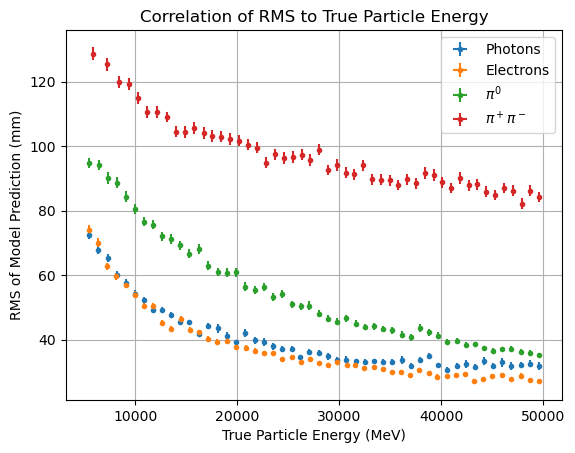

In [17]:
plt.figure()
plt.errorbar(Pt_ph, RMS_ph1, xerr=err_ph1,yerr=uc_ph1, fmt='.',label='Photons')
plt.errorbar(Pt_ele,RMS_ele1, xerr=err_ele1,yerr=uc_ele1,fmt='.',label='Electrons')
plt.errorbar(Pt_pi0,RMS_pi01, xerr=err_pi01,yerr=uc_pi01,fmt='.',label='$\pi^0$')
plt.errorbar(Pt_pipm,RMS_pipm1, xerr=err_pipm1,yerr=uc_pipm1,fmt='.',label='$\pi^+\pi^-$')
plt.legend()
plt.grid(True)
plt.xlabel("True Particle Energy (MeV)")
plt.ylabel("RMS of Model Prediction (mm)")
plt.title("Correlation of RMS to True Particle Energy")